<a href="https://colab.research.google.com/github/KseniyaBarinova/Datasets/blob/main/2_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Практическая работа №2

Выберите свой набор данных (не iris)

- Проверить на выбросы, пропуски. +


- Реализовать алгоритм K-Means для разных значений K (от 2 до 10).
- Для каждого K:
    - Вычислить Silhouette Score и Inertia.
    - Выбрать K, при котором Silhouette Score максимален и Inertia оптимальна.
(Подумайте как сделать процесс выбора числа кластеров полностью автоматическим)


- Определить, сколько главных компонент объясняют 95% дисперсии данных и перевести данные в эту размерность.
- Повторить кластеризацию K-Means с использованием преобразованных данных.
- Сравнить качество кластеризации с использованием PCA и без PCA.

- Отрисовать данные через 2 главные компоненты.


Используйте Python и библиотеку scikit-learn.
Оформите отчет, в котором подробно опишите ход выполнения работы, полученные результаты и выводы.
Сделайте выводы о применимости K-Means к данным.
Обсудите влияние PCA на кластеризацию.
Сравните методы определения числа кластеров.

# Principal Component Analysis

In [2]:
import numpy as np
import matplotlib.cm as cm
import pandas as pd

from numpy.typing import NDArray
from numpy import float32, float64
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score


In [3]:
data = datasets.load_wine(as_frame=True).data

print('Data dimension:', data.shape[-1])

Data dimension: 13


In [4]:
data[:10]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c8/Singular_value_decomposition_visualisation.svg/440px-Singular_value_decomposition_visualisation.svg.png)



In [5]:
matrix_u, singular_values, matrix_v = np.linalg.svd(data, full_matrices=False, compute_uv=True)

In [6]:
def get_variance(singular_values: NDArray[float32]) -> float32:
    sqr_singular_values = singular_values ** 2
    variance = np.sum(sqr_singular_values)
    return variance


def get_explained_variances(singular_values: NDArray[float32]) -> NDArray[float32]:
    variance = get_variance(singular_values)
    explained_variances = singular_values ** 2 / variance
    return explained_variances


def get_svd_info(singular_values: NDArray[float32]) -> pd.DataFrame:
    explained_variances = get_explained_variances(singular_values)
    data = {
        'Singular values': [np.around(singular_values, 2)],
        'Total variance': [np.around(get_variance(singular_values), 2)],
        'Explained variances': [np.around(explained_variances, 2)],
    }

    for num_singular_values in range(1, len(singular_values)):

        data[f'Explained variance (via {num_singular_values} components)'] = [
                    np.around(np.sum(explained_variances[:num_singular_values]), 2)]
    return pd.DataFrame(data).T

In [7]:
get_svd_info(singular_values)

,0
Singular values,"[10886.67, 493.56, 57.15, 30.1, 18.54, 14.46, ..."
Total variance,118768104.78
Explained variances,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Explained variance (via 1 components),1.0
Explained variance (via 2 components),1.0
Explained variance (via 3 components),1.0
Explained variance (via 4 components),1.0
Explained variance (via 5 components),1.0
Explained variance (via 6 components),1.0
Explained variance (via 7 components),1.0


In [8]:
decomposition_rank = 2

In [9]:
def low_rank_approx(matrix_u: NDArray[float32], singular_values: NDArray[float32],
                    matrix_v: NDArray[float32], precision: int) ->  NDArray[float64]:

    approximated_matrix = np.zeros((len(matrix_u), len(matrix_v)))
    for precision_id in range(precision):
        approximated_matrix += singular_values[precision_id] * np.outer(matrix_u.T[precision_id],
                                                                        matrix_v[precision_id])
    return approximated_matrix


def get_metrics(original_matrix: NDArray[float32], approximated_matrix: NDArray[float64]) -> pd.DataFrame:

    errors = original_matrix - approximated_matrix

    frobenius_norm = np.linalg.norm(errors, ord='fro') ** 2
    spectral_norm = np.linalg.norm(errors, ord=2)

    relative_error_frobenius_norm = frobenius_norm / np.linalg.norm(original_matrix, ord='fro') ** 2

    data = [
        ('Frobenius norm', frobenius_norm),
        ('Spectral norm', spectral_norm),
        ('Relative Frobenius norm', relative_error_frobenius_norm),
    ]

    return pd.DataFrame(data, columns=['Norm', 'Result']).round(2)

In [10]:
approximated_data = low_rank_approx(matrix_u, singular_values, matrix_v, precision=decomposition_rank)
get_metrics(data, approximated_data)

,Norm,Result
0,Frobenius norm,4919.63
1,Spectral norm,57.15
2,Relative Frobenius norm,0.00


Text(0.5, 1.0, 'Dataset')

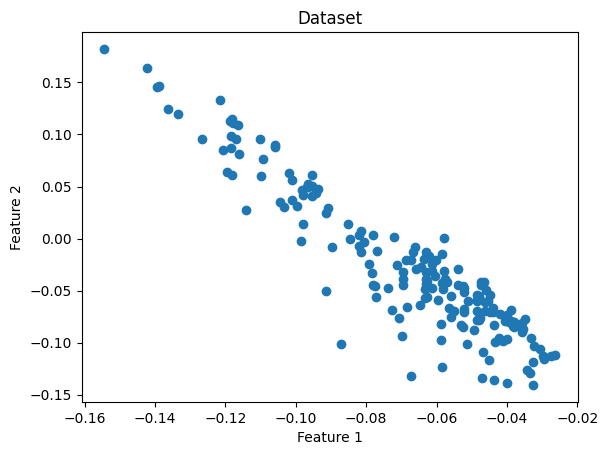

In [11]:
embeddings_pca = matrix_u[:,:decomposition_rank]
plt.scatter(embeddings_pca[:,0], embeddings_pca[:,1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset')

1) Проверить на выбросы, пропуски.

In [12]:
def get_number_of_missing_values(data: pd.Series) -> dict[str, int]:
    result_dict = {}

    for label, content in data.items():
        result_dict[label] = sum(pd.isna(content))
    return result_dict

In [13]:
get_number_of_missing_values(data)

{'alcohol': 0,
 'malic_acid': 0,
 'ash': 0,
 'alcalinity_of_ash': 0,
 'magnesium': 0,
 'total_phenols': 0,
 'flavanoids': 0,
 'nonflavanoid_phenols': 0,
 'proanthocyanins': 0,
 'color_intensity': 0,
 'hue': 0,
 'od280/od315_of_diluted_wines': 0,
 'proline': 0}

<Axes: ylabel='alcohol'>

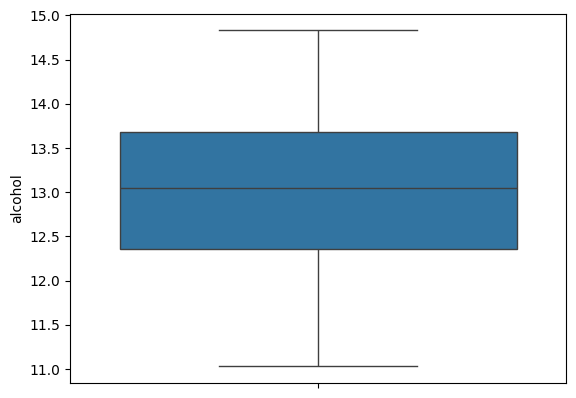

In [14]:
# import matplotlib.pyplot as plt

# data.plot(kind='hist', density=1, bins=20, stacked=False, alpha=.5)


import seaborn as sns
sns.boxplot(data['alcohol'])

Датасет не имеет пустых ячеек и выбросов

2) Реализовать алгоритм K-Means для разных значений K (от 2 до 10).

3) Для каждого K:
Вычислить Silhouette Score и Inertia.
Выбрать K, при котором Silhouette Score максимален и Inertia оптимальна. (Подумайте как сделать процесс выбора числа кластеров полностью автоматическим)

In [15]:
scaler =StandardScaler()

features =scaler.fit(data)
features =features.transform(data)

# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=data.columns)
# Print the scaled data
scaled_df.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242


In [16]:
X=scaled_df.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

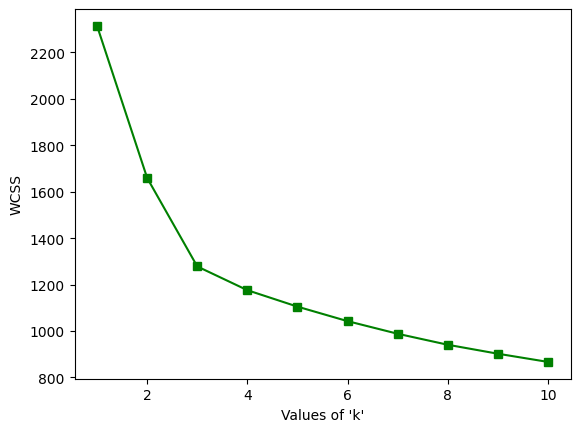

In [17]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_

plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
kmeans.cluster_centers_

array([[ 0.04197899, -0.38224053, -0.10922044, -0.29717226,  0.08897972,
         0.5428402 ,  0.60204711, -0.48200615,  0.41194796, -0.31261472,
         0.50738654,  0.61509448,  0.26067933],
       [-0.07297886,  0.66451047,  0.18987553,  0.51662255, -0.15468782,
        -0.94370681, -1.04663574,  0.83794915, -0.71615568,  0.54346866,
        -0.88207198, -1.06931809, -0.45318098]])

In [18]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [19]:
kmeans.cluster_centers_

array([[ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618]])

In [ ]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
kmeans.cluster_centers_

array([[-0.79224795,  0.07043649,  0.2347602 ,  0.36074812,  0.49143495,
         0.65410534,  0.55588965, -0.57301631,  0.91275344, -0.74607791,
         0.33780317,  0.61857119, -0.49101567],
       [-0.88121818, -0.55823896, -0.68178269,  0.13696599, -0.73926272,
        -0.39718325, -0.18275771,  0.30565919, -0.38330558, -0.88925551,
         0.48969014,  0.09949567, -0.79422515],
       [ 0.18654314,  0.90497145,  0.24921026,  0.58370348, -0.05063539,
        -0.988557  , -1.23619475,  0.71684172, -0.74960756,  0.98849829,
        -1.19129878, -1.30153966, -0.38004461],
       [ 0.97576974, -0.36378464,  0.24534469, -0.81416494,  0.43559525,
         0.89901929,  0.98462062, -0.61854156,  0.54730527,  0.24550357,
         0.47704578,  0.77086772,  1.25833074]])

In [ ]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [ ]:
kmeans.cluster_centers_

array([[-0.81015603, -0.31069039, -0.97246932, -0.24299948, -0.4348982 ,
         0.23788065,  0.25722283, -0.5367775 ,  0.30462265, -0.82270459,
         0.36113267,  0.47818633, -0.67795725],
       [ 0.20305535,  0.94432818,  0.26327524,  0.60834422, -0.03012665,
        -0.99930052, -1.23163592,  0.69179811, -0.75278098,  1.00556015,
        -1.19715603, -1.29623699, -0.38153396],
       [ 1.13003348, -0.40246576, -0.04784213, -1.10782026,  0.39729706,
         1.03607067,  1.09247533, -0.79999916,  0.77935402,  0.38297094,
         0.36593785,  0.86970203,  1.3107136 ],
       [ 0.49630726, -0.30264562,  1.10202368,  0.18409157,  0.86070511,
         0.7481088 ,  0.85410495, -0.25344969,  0.3859861 , -0.09191674,
         0.72720386,  0.69762614,  0.84958071],
       [-0.98853417, -0.37951123,  0.08322795,  0.54203128, -0.56111504,
        -0.60677698, -0.40264625,  0.84551995, -0.48527528, -0.88640567,
         0.40385699, -0.20516695, -0.72595212]])

In [ ]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
kmeans.cluster_centers_

array([[ 0.90864722, -0.36460914,  0.3020082 , -0.71347063,  0.5725883 ,
         0.89878321,  0.95952145, -0.6123277 ,  0.6031962 ,  0.19786935,
         0.50968263,  0.77348893,  1.20155292],
       [-0.62016051, -0.82385449, -1.16480988, -0.74061461,  0.63000413,
        -0.77387727, -0.68698397, -0.1415613 , -0.69364814, -0.72527335,
         0.47060722, -0.64907755, -0.44389696],
       [-0.79373485, -0.18298712, -0.6777212 ,  0.04822929, -0.63717949,
         0.42710838,  0.40566648, -0.53421946,  0.38972388, -0.82862668,
         0.27808662,  0.63125702, -0.76057717],
       [-0.0416549 ,  1.08883131,  0.00264839,  0.35875389, -0.34986973,
        -1.12485103, -1.32934958,  0.90198413, -1.09934624,  0.34240737,
        -1.02210373, -1.19419003, -0.45108952],
       [-1.16544176, -0.33056722,  0.58192089,  1.04822598, -0.65055346,
        -0.40114443, -0.0030914 ,  0.944324  , -0.11337456, -0.93455483,
         0.59407947,  0.19536147, -0.79290231],
       [ 0.51187159,  0.731731

In [ ]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [ ]:
kmeans.cluster_centers_

array([[ 0.35223735,  0.96101551,  0.40638418,  0.74645606,  0.07755631,
        -0.8216831 , -1.15884833,  0.62968586, -0.41331468,  1.77985348,
        -1.48387986, -1.36810407, -0.31161799],
       [ 0.39543643, -0.20218714,  0.52718747, -0.2153542 ,  0.41862111,
         0.62324563,  0.64847769, -0.49542262,  0.07759334, -0.32984946,
         0.53117106,  0.79904999,  0.65257141],
       [-1.06866985, -0.13050278,  0.34996676,  0.84134761, -0.56621117,
        -0.19478579,  0.12218082,  0.38275309,  0.05494394, -0.93087367,
         0.1399798 ,  0.3561977 , -0.85022809],
       [-0.85655493, -0.61826398, -1.36898678, -0.39125448, -0.82441507,
         0.09243473,  0.11357909, -0.46295265, -0.02119825, -0.8611992 ,
         0.8131957 ,  0.4021431 , -0.8569258 ],
       [-1.0908847 , -0.42760033, -1.59561791, -0.59154456,  2.75646531,
         0.09996568, -0.0344056 , -0.80057472,  2.52142624, -0.91730353,
         0.4608924 ,  0.13180155, -0.01637867],
       [ 1.18165971, -0.423860

In [ ]:
kmeans=KMeans(n_clusters=8)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [ ]:
kmeans.cluster_centers_

array([[ 0.54176501, -0.29366899,  1.16343341,  0.14925851,  0.66691629,
         0.77054144,  0.88101126, -0.24700344,  0.25773354, -0.05385059,
         0.68508541,  0.73095979,  0.88244468],
       [-0.0640707 ,  0.96069183, -0.05009409,  0.28585065, -0.29342668,
        -1.11329973, -1.29156018,  0.83113101, -1.11907607,  0.37702695,
        -0.98281625, -1.22370217, -0.45613736],
       [-0.69519711, -0.84559912, -1.39695808, -0.39929689, -0.74504346,
         0.09630819,  0.09545531, -0.65956311, -0.22629874, -0.72664361,
         0.68455129,  0.37529441, -0.67117289],
       [ 1.14912299, -0.39935034, -0.07650124, -1.11041937,  0.42290428,
         1.04039292,  1.09771452, -0.81834929,  0.80953698,  0.39751838,
         0.38153318,  0.87001063,  1.30729361],
       [ 0.55055489,  0.7214085 ,  0.58604345,  0.92607998,  0.29160751,
        -0.75369753, -1.08672125,  0.5491078 , -0.2081364 ,  1.89229543,
        -1.47126848, -1.40813282, -0.32447844],
       [-0.88495303,  0.668493

In [ ]:
kmeans=KMeans(n_clusters=9)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [ ]:
kmeans.cluster_centers_

array([[-1.1976701 , -0.33830647,  0.31285481,  0.92924088, -0.87984665,
        -0.54623776, -0.1990033 ,  0.9519981 , -0.18139407, -1.02072191,
         0.62310847,  0.09203013, -0.84304811],
       [ 1.16412893, -0.47003531,  0.28079042, -0.85474891,  0.52665982,
         1.16102478,  1.1969748 , -0.59851913,  0.90632323,  0.55792397,
         0.53501183,  0.69699268,  1.49956097],
       [ 0.06773769,  1.36609385,  0.20879128,  0.56114033, -0.39356048,
        -1.05043553, -1.40664557,  1.24500923, -1.08945987,  0.2989063 ,
        -0.96000707, -1.11628429, -0.38744457],
       [-0.86399559, -0.27684572, -0.68285779,  0.07482316, -0.6612723 ,
         0.42867929,  0.39257554, -0.53395614,  0.41480273, -0.85858852,
         0.31830389,  0.63612672, -0.82603621],
       [-0.98279901, -0.7911539 , -0.75488951, -0.44140207,  3.23040535,
        -0.53295528, -0.43348237, -1.00201987,  1.63662375, -0.96056053,
         0.68025933, -0.06240934,  0.0337771 ],
       [-0.57722035, -0.370748

In [ ]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [ ]:
kmeans.cluster_centers_

array([[-0.19752343,  0.49827509,  0.07017316,  0.40690303,  0.47453173,
        -1.40450919, -1.10649864, -0.51567372, -0.94770034,  0.12750747,
        -1.10883472, -1.35529896, -0.37565781],
       [ 0.18642679, -0.35647778,  1.45799765,  0.55820047,  0.76888766,
         0.70053187,  0.83711474, -0.16369813,  0.25988996, -0.31794454,
         0.83465991,  0.73100325,  0.30335675],
       [-1.10464106, -0.32681724,  0.19716065,  0.88462916, -0.73505263,
        -0.56536607, -0.21009978,  0.80549253, -0.25084869, -1.01374697,
         0.56359601,  0.10676279, -0.86178939],
       [ 1.0688638 , -0.48472434,  0.4430654 , -0.74646432,  0.41389294,
         1.17826198,  1.26116782, -0.56799714,  1.00507707,  0.68625306,
         0.66729674,  0.47399792,  1.79277564],
       [-0.65182067, -0.83841322, -1.63647172, -0.58492063, -0.82028487,
        -0.2362883 , -0.04533112, -0.52210642, -0.34580791, -0.76685823,
         0.79574957,  0.35322273, -0.64836019],
       [ 0.42643243,  1.046063

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.26831340971052126
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.24519129323772165
For n_clusters = 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 The average silhouette_score is : 0.23223087806001866


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.23533337693317755


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.15443603752268886


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.14706734078306893


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.16630639639166148


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 10 The average silhouette_score is : 0.13462903548660346


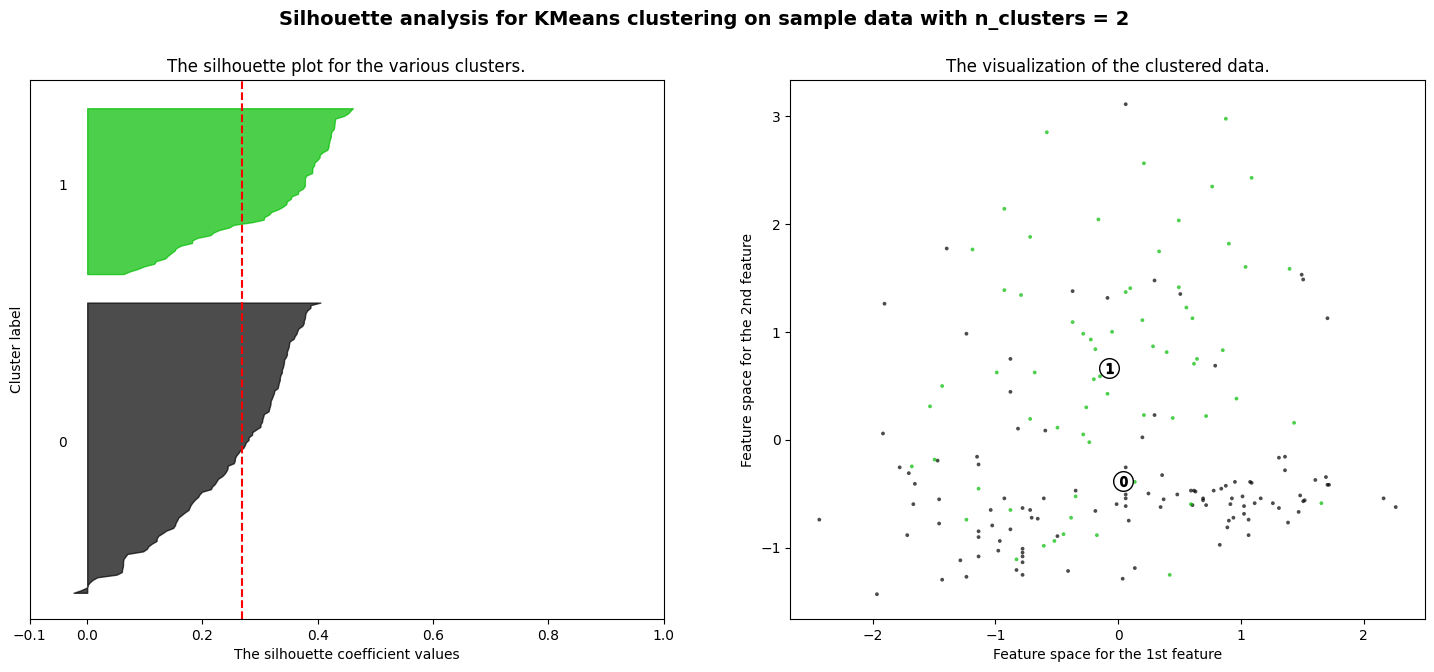

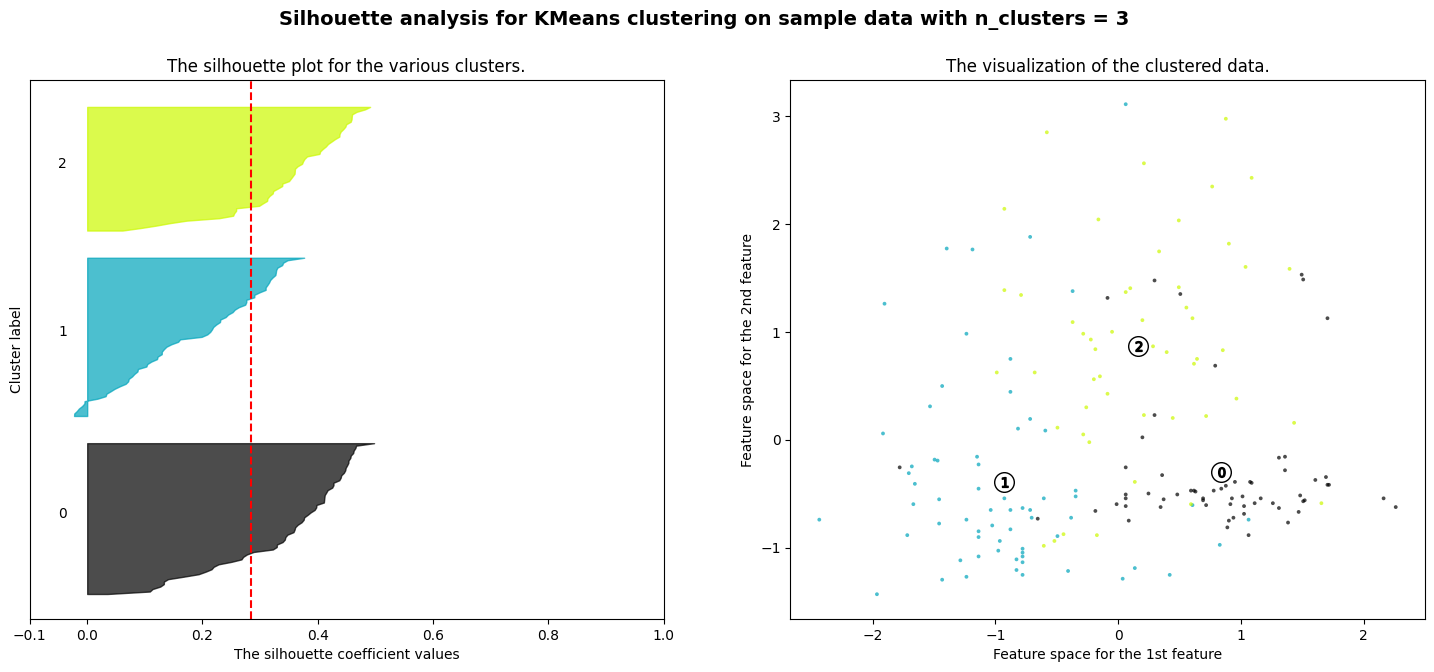

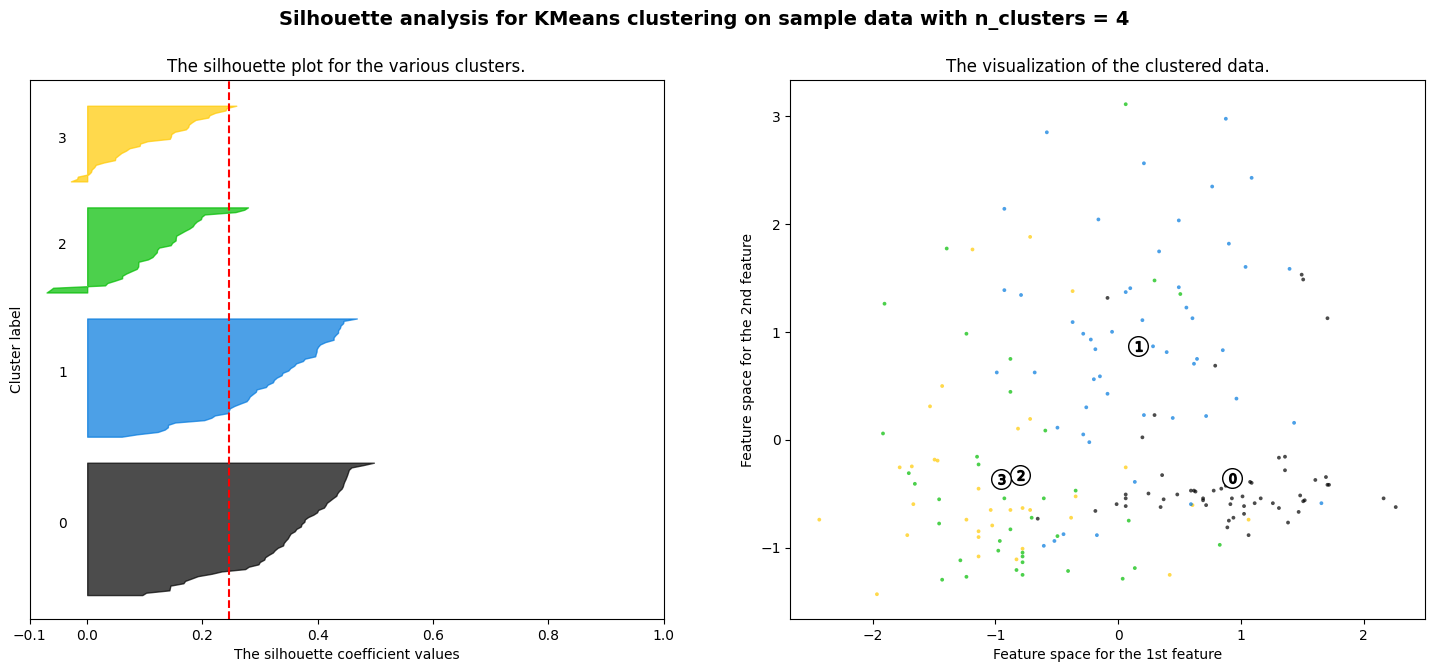

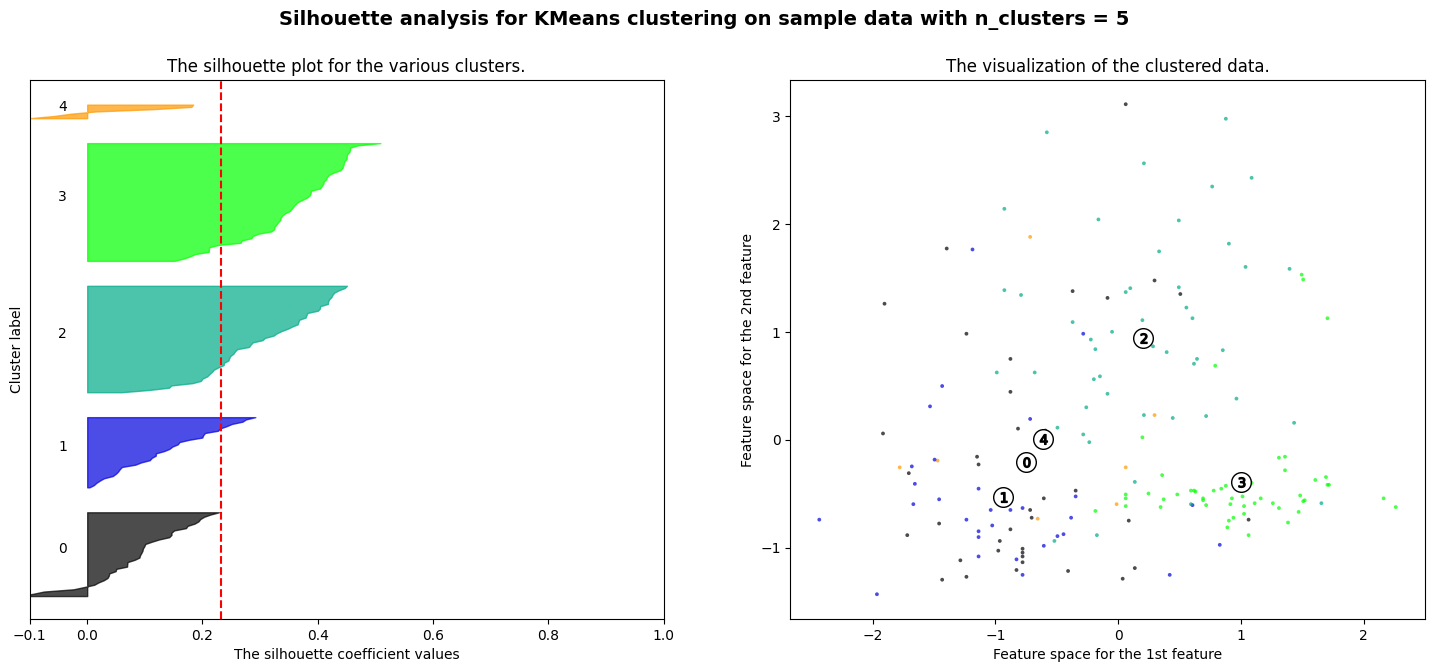

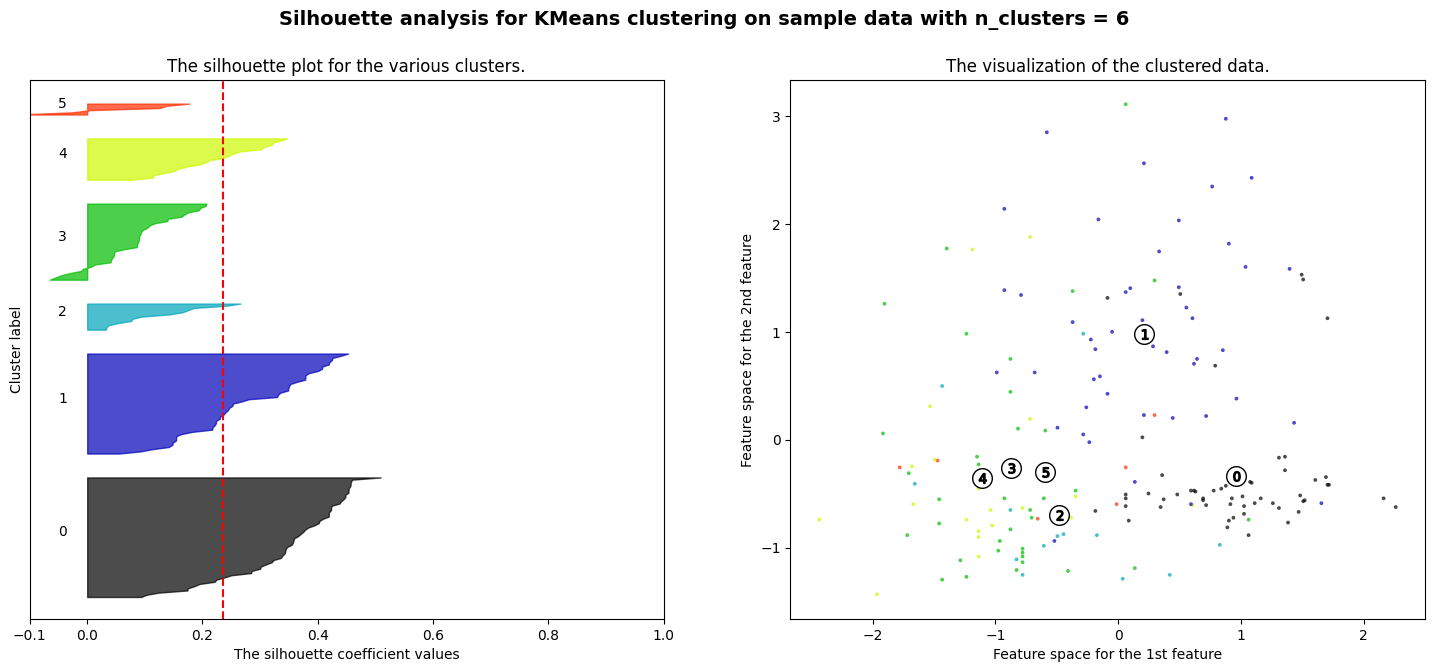

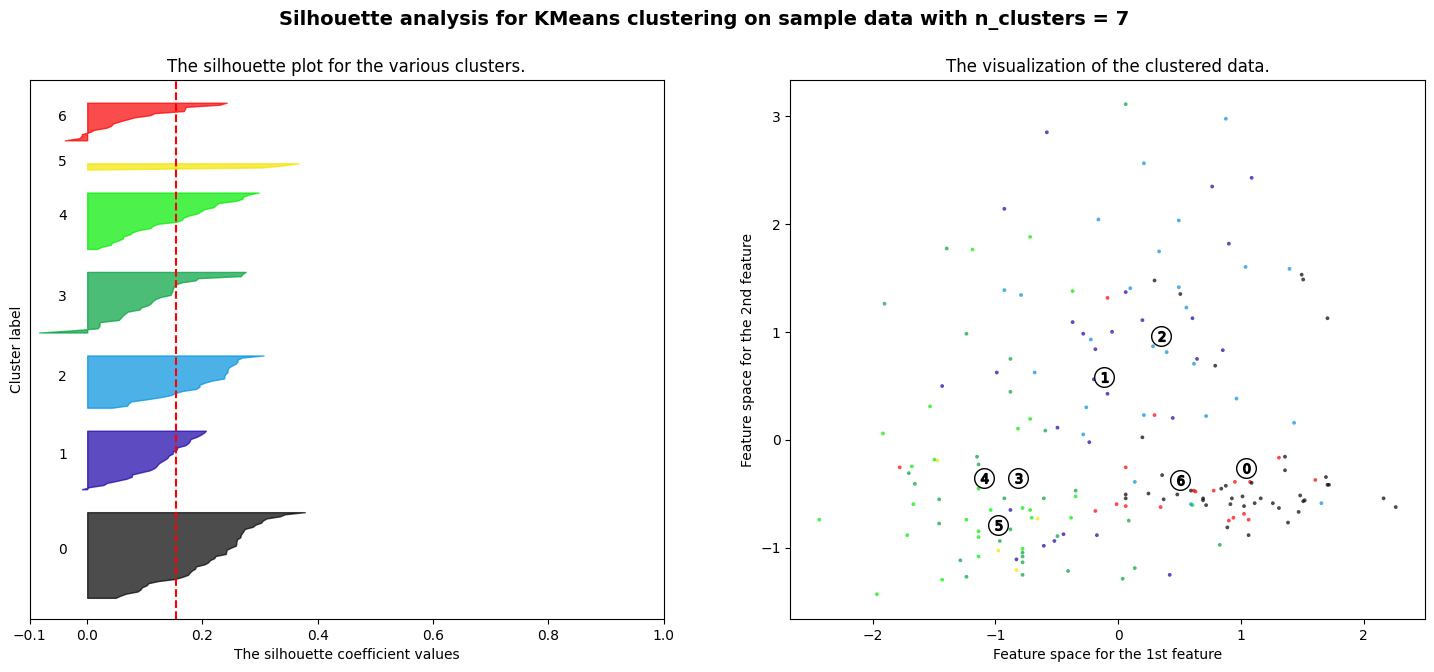

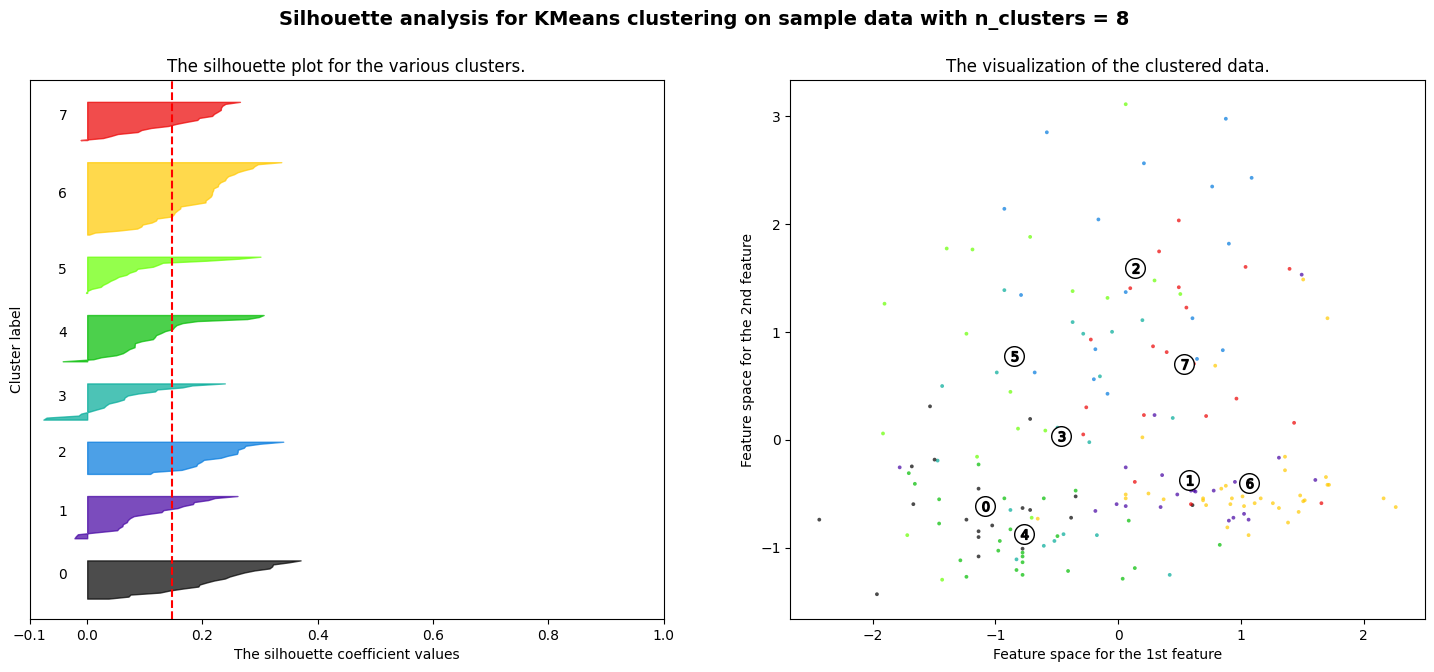

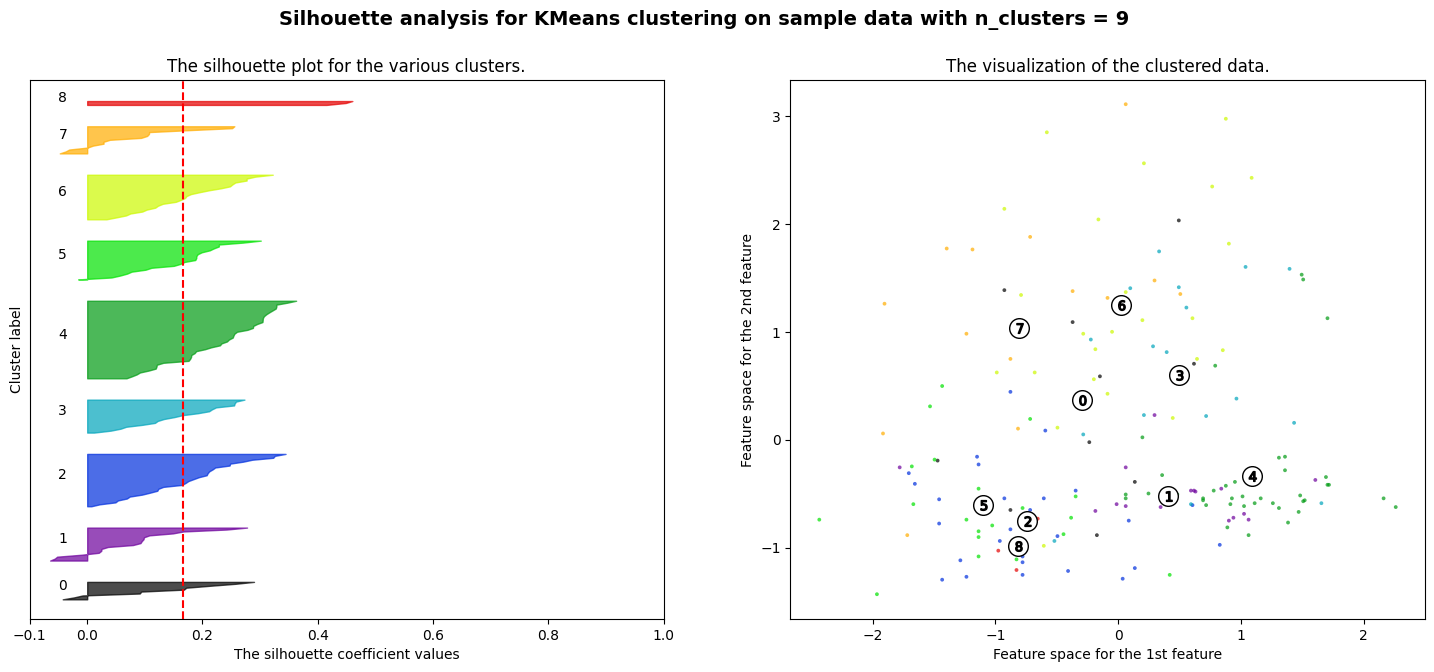

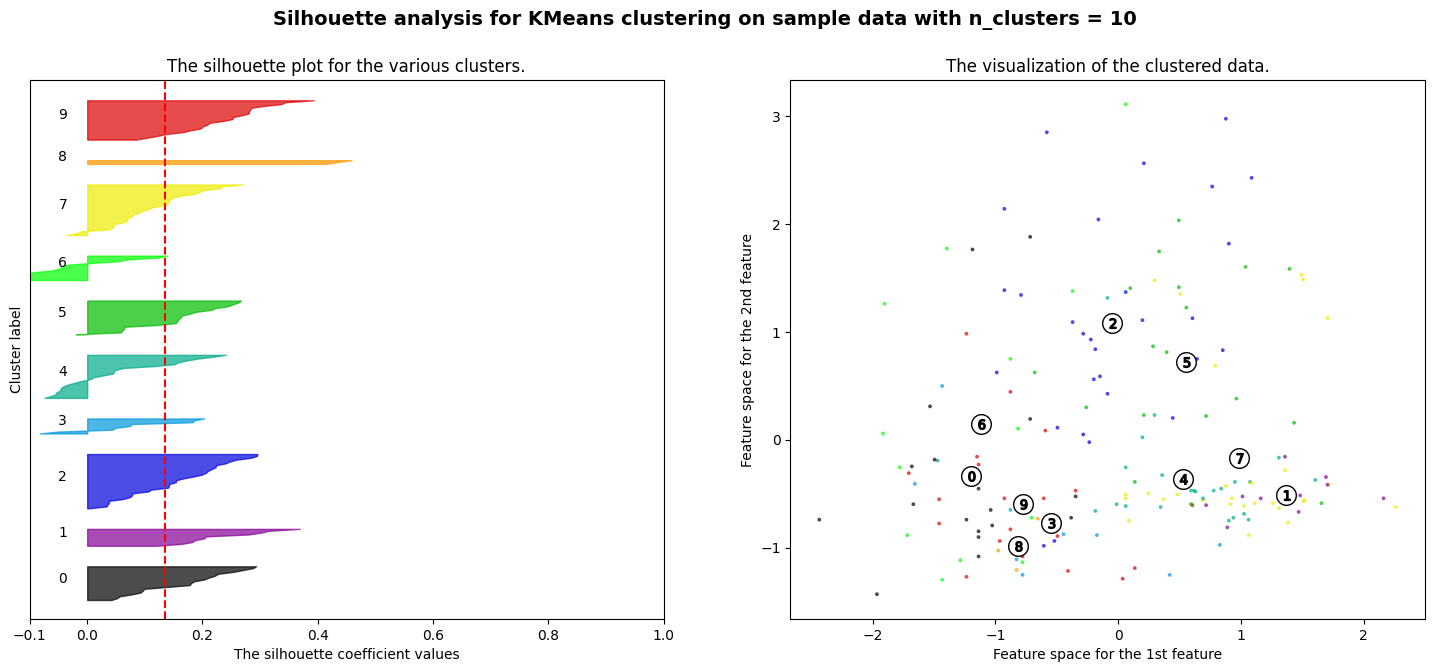

In [20]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [21]:
# создаем объект PCA и обучаем модель
pca = PCA()
pca.fit(X)

# вычисляем количество компонент, объясняющих 95% дисперсии данных
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"Количество главных компонент, объясняющих 95% дисперсии данных: {n_components}")

# переводим данные в новую размерность
pca = PCA(n_components=n_components)
X_transformed = pca.fit_transform(X)

print("Данные в новой размерности:")
print(X_transformed)

Количество главных компонент, объясняющих 95% дисперсии данных: 10
Данные в новой размерности:
[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 ...  6.51390947e-02
   6.41442706e-01  1.02095585e+00]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 ...  1.02441595e+00
  -3.08846753e-01  1.59701372e-01]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01 ... -3.44216131e-01
  -1.17783447e+00  1.13360857e-01]
 ...
 [-2.67783946e+00 -2.76089913e+00 -9.40941877e-01 ...  4.70238043e-02
   1.22214687e-03 -2.47997312e-01]
 [-2.38701709e+00 -2.29734668e+00 -5.50696197e-01 ...  3.90828774e-01
   5.74476725e-02  4.91489502e-01]
 [-3.20875816e+00 -2.76891957e+00  1.01391366e+00 ... -2.92913734e-01
   7.41660423e-01 -1.17969019e-01]]


Повторить кластеризацию K-Means с использованием преобразованных данных.

In [22]:
kmeans=KMeans(n_clusters=3)
kmeans.fit_predict(X_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [23]:
kmeans.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02, -5.02855192e-02,
         7.46793027e-02],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02,  3.22512140e-02,
        -2.30035303e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03,  2.00269270e-02,
        -6.14683784e-02]])

Сравнить качество кластеризации с использованием PCA и без PCA.

Отрисовать данные через 2 главные компоненты.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


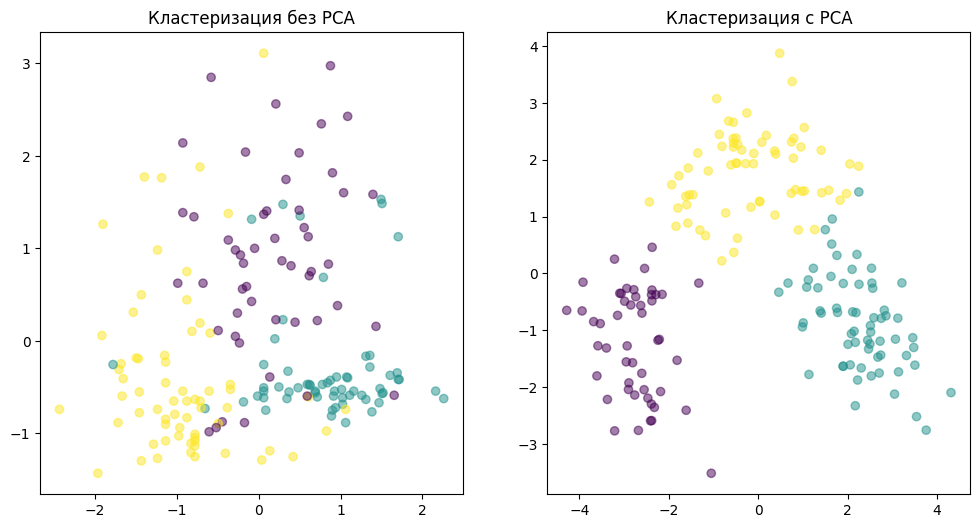

In [24]:
# Кластеризация без PCA
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Кластеризация с PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Отрисовка данных
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.title('Кластеризация без PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.5)
plt.title('Кластеризация с PCA')

plt.show()